# Принятие решений в бизнесе
# Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
<br>Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 


## Приоритизация гипотез.
В файле */datasets/hypothesis.csv* 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами *Reach, Impact, Confidence, Effort*. <br><br>
**Задача**
* Применим фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Применим фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
#Откроем файл с гипотезами:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

#Приведем названия столбцов к нижнему регистру:
data.columns = data.columns.str.lower()

#Применим фреймворк ICE:
data['ICE'] = (data['impact'] * data['confidence'])/data['efforts']
display(data[['hypothesis', 'ICE']].sort_values(by=['ICE'], ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [3]:
#Применим фреймворк RICE:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence'])/data['efforts']
display(data[['hypothesis', 'RICE']].sort_values(by=['RICE'], ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


 **Как изменилась приоритизация гипотез при применении RICE вместо ICE? Почему так произошло?**
 <br>
При применении RICE в числителе формулы одним из множителей учитывается Reach — скольких пользователей затронет изменение, которое мы хотим внести. Таким образом, мы смогли оценить степень влияния каждой гипотезы, ее масштабность, охват.
<br><br>
Таким образом, по RICE наибольшее эффективны гипотезы **7,2,0**. А по ICE наиболее перспективны **8,0,7.**
То есть благодаря RICE мы получаем в топе также 2-ю гипотезу, помимо 0-й и 7-й, которые вышли в топ ICE.<br>
**Гипотеза 2:** *Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.*
<br><br>
Остальные части фреймворков RICE и ICE идентичны:<br>
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;<br>
Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так; <br>
Efforts — каких усилий стоит протестировать эту гипотезу. <br>


## Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах */datasets/orders.csv* и */datasets/visitors.csv.*
<br><br>
**Задача** <br>
Проанализируем A/B-тест:
1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
14. Примем решение по результатам теста и объясним его. Варианты решений: <br>
А) Остановить тест, зафиксировать победу одной из групп.<br>
Б) Остановить тест, зафиксировать отсутствие различий между группами.<br>
В) Продолжить тест.
<br>

### Предобработка данных:

In [4]:
#Прочтём данные из файлов с результатами A/B-тестирования: 

orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv(
    '/datasets/visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

display(orders.head())
display(visitors.head()) 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Столбцы датафрейма orders:**
* *transactionId* — идентификатор транзакции / заказа;
* *visitorId* — идентификатор пользователя, совершившего заказ;
* *date* — дата заказа;
* *revenue* — выручка с заказа;
* *group* — группа A/B-теста (A или B).


**Столбцы датафрейма visitors:** 
* *date* — дата;
* *group* — группа A/B-теста (A или B);
* *visitors* — количество посетителей интернет-магазина в определённой группе A/B-теста в указанную дату.

#### Типы данных

In [5]:
#Узнаем, какие типы данных в наших датасетах:
print('Типы данных в visitors')
print(visitors.info())
print()
print('Типы данных в orders')
print(orders.info())


Типы данных в visitors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None

Типы данных в orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


**Вывод:**
* Типы данных соответствуют содержимому столбцов.

#### Пропуски данных

Посмотрим, где пропущены значения и сколько всего пропусков в столбцах.<br>
А также посчитаем общее количество строк в файлах.

In [6]:
no_visitors = visitors.isna().sum().sort_values(ascending=False)
no_orders = orders.isna().sum().sort_values(ascending=False)

print(no_visitors)
print('Всего строк в visitors:', len(visitors))
print()

print(no_orders)
print('Всего строк в orders:', len(orders))

date        0
group       0
visitors    0
dtype: int64
Всего строк в visitors: 62

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Всего строк в orders: 1197


**Вывод:**
* Все в порядке, пропусков нет.
* В visitors 62 строки, в orders - 1197.

#### Проверим, сколько человек попали в группы А и В

In [7]:
new_profiles = visitors.groupby(['group']).count()
print(new_profiles)

       date  visitors
group                
A        31        31
B        31        31


#### Проверка на дубликаты

In [8]:
#Проверка на явные дубликаты:
print('Полных совпадений строк в visitors:', visitors.duplicated().sum())
print('Полных совпадений строк в orders:', orders.duplicated().sum())
print()

#Совпадения заказов по ID посетителя:
print('Совпадений заказов по ID посетителя:')
print(orders['visitorId'].value_counts().head(15))


Полных совпадений строк в visitors: 0
Полных совпадений строк в orders: 0

Совпадений заказов по ID посетителя:
4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
237748145      5
3717692402     5
3062433592     5
3803269165     5
1230306981     5
2587333274     4
1614305549     4
457167155      4
3967698036     3
611059232      3
Name: visitorId, dtype: int64


In [9]:
#Смотрим, в каких группах у нас посетители, которые совершали от 4 заказов:
visitor_1 = orders.query('visitorId == 4256040402')
visitor_2 = orders.query('visitorId == 2458001652')
visitor_3 = orders.query('visitorId == 2378935119')
visitor_4 = orders.query('visitorId == 2038680547')
visitor_5 = orders.query('visitorId == 199603092')
visitor_6 = orders.query('visitorId == 237748145')
visitor_7 = orders.query('visitorId == 3717692402')
visitor_8 = orders.query('visitorId == 3062433592')
visitor_9 = orders.query('visitorId == 3803269165')
visitor_10 = orders.query('visitorId == 1230306981')
visitor_11 = orders.query('visitorId == 2587333274')
visitor_12 = orders.query('visitorId == 1614305549')
visitor_13 = orders.query('visitorId == 457167155')
print(visitor_1)
print()
print(visitor_2)
print()
print(visitor_3)
print()
print(visitor_4)
print()
print(visitor_5)
print()
print(visitor_6)
print()
print(visitor_7)
print()
print(visitor_8)
print()
print(visitor_9)
print()
print(visitor_10)
print()
print(visitor_11)
print()
print(visitor_12)
print()
print(visitor_13)

      transactionId   visitorId       date  revenue group
60       1421016313  4256040402 2019-08-16    56650     B
114      1120327437  4256040402 2019-08-01     5800     A
187      2048878902  4256040402 2019-08-17     1550     A
253      1610091760  4256040402 2019-08-23    16950     A
263      2575861846  4256040402 2019-08-18    10970     B
588      3700356838  4256040402 2019-08-20    17650     A
873      2519737434  4256040402 2019-08-08    58220     B
901      3402467119  4256040402 2019-08-27     1630     A
1018     1415970216  4256040402 2019-08-31     5170     A
1019      453824282  4256040402 2019-08-31     1850     B
1091      750632879  4256040402 2019-08-12       50     A

      transactionId   visitorId       date  revenue group
133      3060563671  2458001652 2019-08-22     5190     A
380      1177690313  2458001652 2019-08-25     2385     B
454      3755354294  2458001652 2019-08-06     7349     B
456       543654048  2458001652 2019-08-06     1620     A
483      2280

**Вывод:**
* Действительно, как минимум 12 пользователей (visitorId) из файла orders, которые делали 4 и более заказов, попали в разные группы А и В.

### График кумулятивной выручки по группам:

Чтобы построить графики, нужно собрать кумулятивные данные. 
Объявим датафрейм *cumulativeData* со столбцами: 
* *date* — дата;
* *group* — группа A/B-теста (A или B);
* *orders* — кумулятивное количество заказов на указанную дату в указанной группе;
* *buyers* — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* *revenue* — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* *visitors* — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.


In [10]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


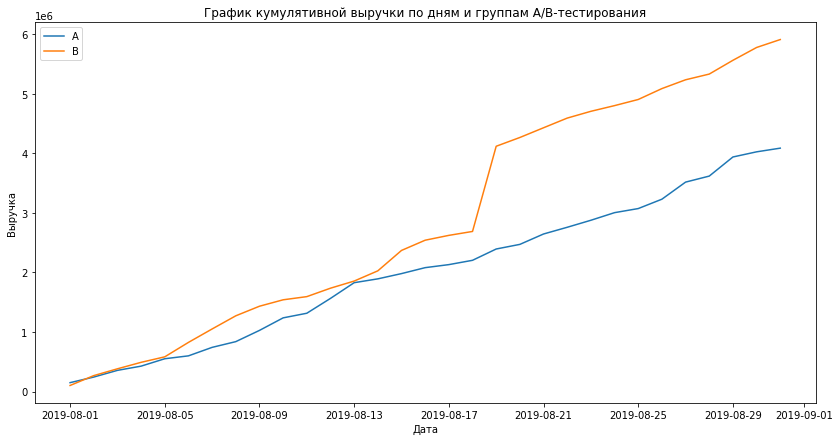

In [11]:
#Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(14, 7))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.legend()
plt.show()

**Вывод:**
* Выручка в группе А почти равномерно увеличивается в течение всего теста.
* Выручка в группе В резко подскочила после 17 августа и далее росла с большим отрывом от группы А. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
* На графике вплоть до конца А/В-тестирования лидирует группа В.

### График кумулятивного среднего чека по группам

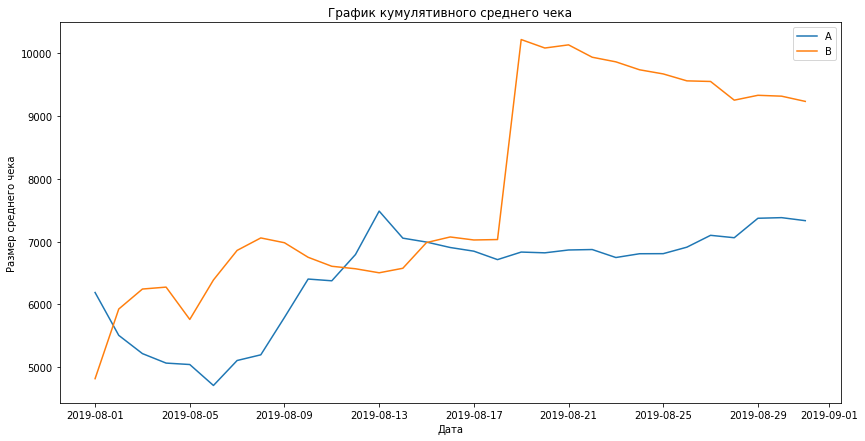

In [12]:
# Для нахождения кумулятивного среднего чека разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(14, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека')
plt.ylabel('Размер среднего чека')
plt.xlabel('Дата')
plt.legend()
plt.show()

**Вывод:**
* Средний чек скачет у обеих групп, но у группы А он становится равномерным  после 17 августа - примерно в районе 7000. 
* Для группы B средний чек резко увеличился до 10000 после 17 августа (в тот же момент, что и на предыдущем графике кумулятивной выручки) и далее несколько снизился (до 9500), но все равно остался в значительном отрыве от среднего чека группы А к концу тестирования. 

### График относительного изменения кумулятивного среднего чека группы B к группе A:

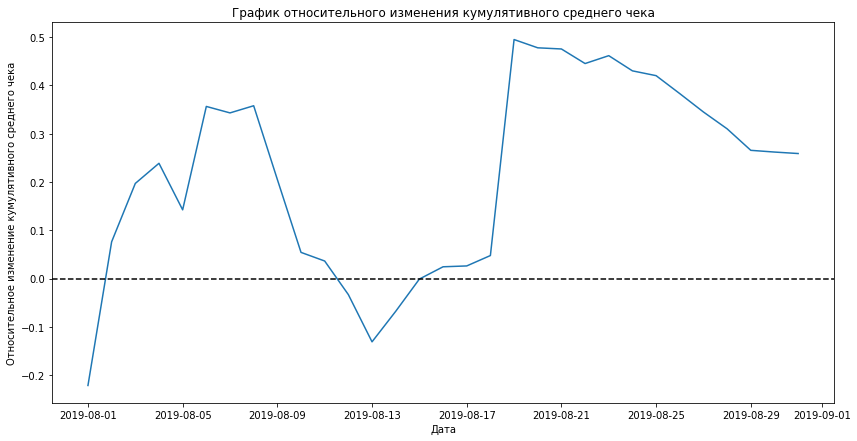

In [13]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(14, 7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.show()

**Вывод:**
* Так как график демонстрирует изменение кумулятивного среднего чека группы В относительно группы А, мы видим сильный разрыв между ними в пользу группы В, как и на предыдущем графике. Скорее всего, в группе В присутствуют особенно крупные заказы и выбросы. 

### График кумулятивного среднего количества заказов на посетителя по группам:

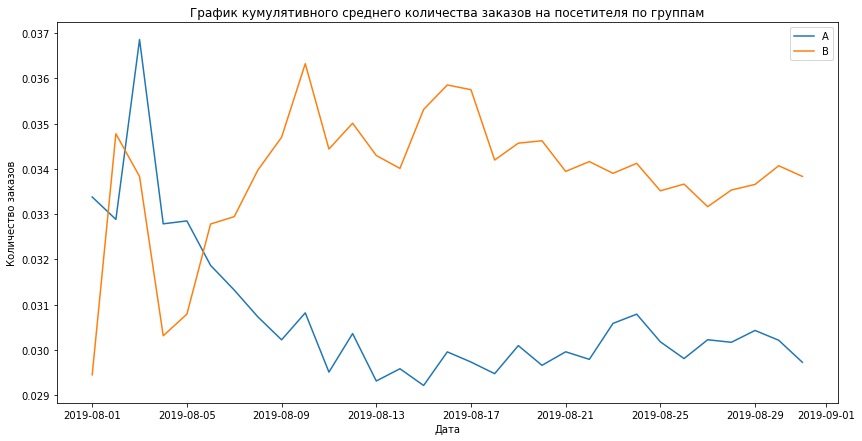

In [14]:
# считаем кумулятивное среднее количество заказов
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(14, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.show()

**Вывод:**
* Если в начале тестирования группы колебались двигались в одном направлении, то после 5 августа количество заказов группы В вырвалось вперёд и зафиксировалось, а количество заказов группы А просело и также зафиксировалось. В целом получился довольно симметричный график.


### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

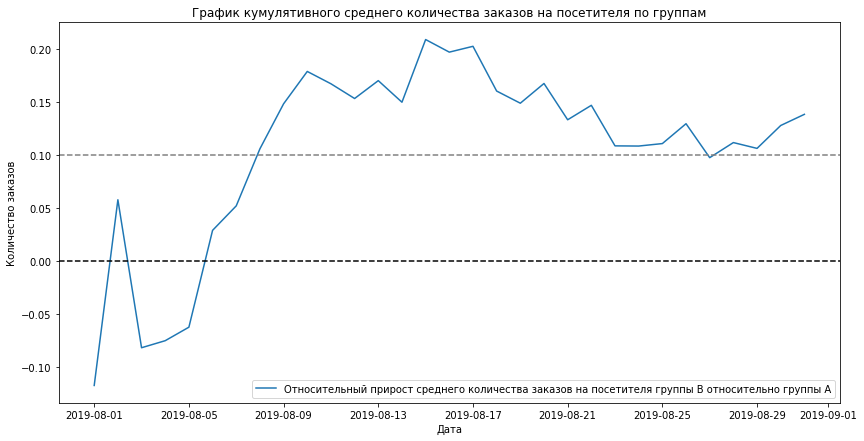

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.show()

**Вывод:**
* В начале теста группа В немного проигрывала группе A, затем вырвалась вперёд. Среднее количество заказов группы В резко выросло после 5 августа и, немного опускаясь до линии поддержки в 0.1, отталкивалось от нее и колебалось в верхнем диапазоне до конца тестирования.
* Следует проанализировать аномалии, возможно, они прояснят ситуацию. 

### Точечный график количества заказов по пользователям:

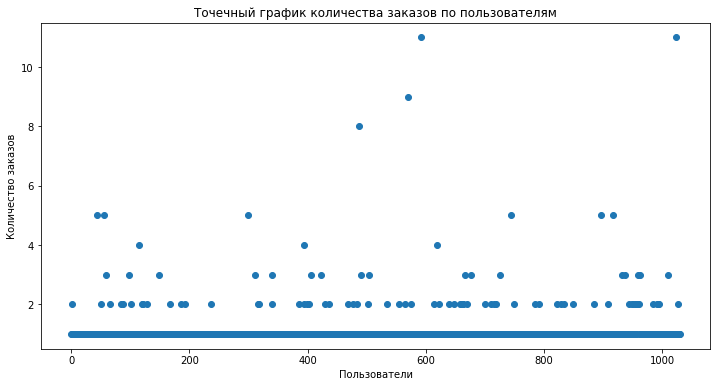

In [16]:
data = pd.read_csv('/datasets/orders.csv', sep=',')
data['date'] = data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

ordersByUsers = (
    data.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)


ordersByUsers.columns = ['visitorId', 'transactionId']

plt.figure(figsize=(12, 6))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionId']) 
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Точечный график количества заказов по пользователям')
plt.show()

**Вывод:**
* Некоторые пользователи заказывали 2 и более раз.
* Есть пользователи, которые заказывали 5 и более раз.
* А кое-кто даже заказывал больше 10 раз.

Взглянем на выборочные перцентили количества заказов на одного пользователя.


### 95-й и 99-й перцентили количества заказов на пользователя.

In [17]:
print(np.percentile(ordersByUsers['transactionId'], [95, 99])) 

[2. 4.]


**Вывод:**
* 5% пользователей заказывали 2 и более раз,
* 1% пользователей заказывал 4 и более раз.   

Разумно выбрать 4 и более заказов на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### Точечный график стоимостей заказов.

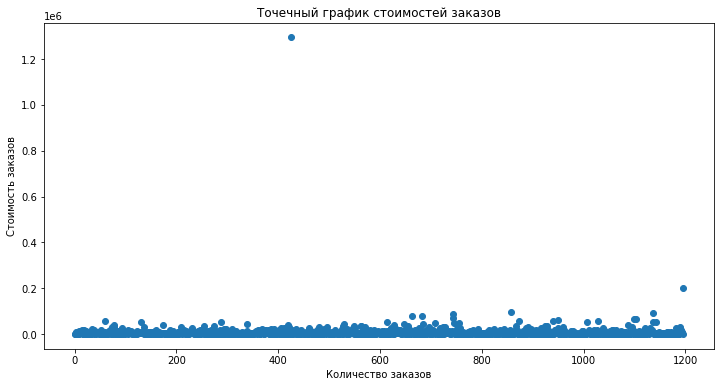

In [18]:
x_values = pd.Series(range(0,len(data['revenue'])))

plt.figure(figsize=(12, 6))
plt.scatter(x_values, data['revenue']) 
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество заказов')
plt.title('Точечный график стоимостей заказов')
plt.show()

**Вывод:**
* Судя по графику, имеются два значительных выброса на графике.
* Попробуем сделать еще один график без выбросов, ограничим значение оси Y. 

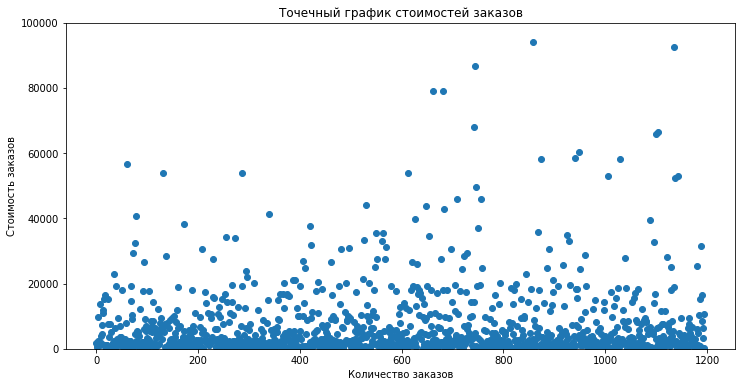

In [19]:

plt.figure(figsize=(12, 6))
plt.scatter(x_values, data['revenue']) 
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество заказов')
plt.ylim(0, 100000)
plt.title('Точечный график стоимостей заказов')
plt.show()

**Вывод:**
* Данный график более информативен - мы видим более явный разброс по стоимости и количеству заказов от 0 до 100 000 руб.
* И все же большинство заказов менее 20 000 руб.

### 95-й и 99-й перцентили стоимости заказов

In [20]:
print(np.percentile(data['revenue'], [95, 99])) 

[28000.  58233.2]


**Вывод:**
* Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233,2 рублей.

Разумно выбрать 5% заказов дороже 28 000 рублей за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

*По «сырым» данным — то есть без удаления аномальных пользователей.*

**План действий таков:**

1. Установим уровень значимости (alpha) равным 0.05.

2. Сформулируем гипотезы: 
* **Нулевая:** различий в среднем количестве заказов между группами нет.
* **Альтернативная:** различия в среднем между группами есть.

3. Создадим переменные: *ordersByUsersA и ordersByUsersB* со столбцами *['userId', 'orders']*, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 

4. Объявим переменные: *sampleA и sampleB*, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. 

5. Посчитаем статистическую значимость различия среднего количества заказов по результатам двух недель теста. Применим тест Манна-Уитни. 

6. Выведем p-value для сравнения среднего между группами. Округлим до 5 знаков после запятой. 

7. Вычислим и выведем относительное различие в среднем между группами. Округлим до 3 знаков после запятой.

In [21]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [22]:
#Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по сырым данным:

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


#Применим статистический критерий Манна-Уитни к полученным выборкам:
print('P-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B по сырым данным:','{0:.3f}'.format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value: 0.01679
Относительный прирост среднего числа заказов группы B по сырым данным: 0.138


**Вывод:**
* По «сырым» данным различия в среднем числе заказов групп A и B есть. 
* Первое число - это p-value = 0.01679 значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, **отвергаем**. 
* Относительный прирост среднего числа заказов группы B по сырым данным по отношению к группе А равен 0.138, то есть 13,8%.


### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

1. Сформулируем гипотезы:
* **Нулевая гипотеза:** различий в среднем чеке между группами нет. 
* **Альтернативная гипотеза:** различия в среднем чеке между группами есть. 

2. Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию *mannwhitneyu()* данные о выручке с заказов. 

In [23]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B по сырым данным:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


P-value: 0.729
Относительный прирост среднего чека группы B по сырым данным: 0.259


**Вывод:**
* P-value 0.729, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
* Средний чек группы B значительно выше среднего чека группы A, на 25,9%. 

Пора переходить к анализу аномалий.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.



Вспомним, что 95 и 99 перцентили стоимости заказов 28000 и 58233,2 рублей соответственно. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказам на пользователя. 

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 28000 рублей. 

Так мы уберём 1% пользователей с наибольшим числом заказов и от 1 до 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 28000 руб — usersWithExpensiveOrders. 

Объединим их в таблице abnormalUsers. 

Узнаем, сколько всего аномальных пользователей атрибутом shape.


In [24]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

#Сколько аонимальных пользователей:
print(abnormalUsers.shape[0]) 

#Сколько всего пользователей:
print(orders['visitorId'].shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
59
1197


**Всего 59 аномальных пользователей** из 1197, т.е. 4,92% от всех пользователей, что является допустимым размером для исключения из выборки.

Узнаем, как их действия повлияли на результаты теста.

1. Создадим переменные *sampleAFiltered и sampleBFiltered*, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей. 
2. Выведем p-value для сравнения среднего между очищенными группами. 
3. Округлим p-value до пяти знаков после запятой. 
4. Выведем относительный прирост среднего очищенной группы B, округлив до трёх знаков после запятой.

Итак, мы проверяем статистическую значимость различий в среднем количестве заказов между сегментами А и В по очищенным данным. 

* **Нулевая гипотеза:** различий в среднем количестве заказов между группами А и В по очищенным данным нет. 
* **Альтернативная гипотеза:** различия в количестве заказов меду группами А и В по очищенным данным есть. 

In [25]:
#Посчитаем наконец статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#Применим статистический критерий Манна-Уитни к полученным выборкам:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B по очищенным данным:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.018
Относительный прирост среднего числа заказов группы B по очищенным данным: 0.145


p-value равен сейчас 0.018, а по сырым данным был равен 0.0167, и оба значения меньше 0.05. 
И нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы все равно отвергаем. 

Относительный прирост среднего количества заказов группы В к  среднему группы А равен 14,5%, а по сырым данным был равен 13,8%. То есть прирост после удаления аномалий получился еще выше, чем по сырым данным.

По полученным **очищенным данным**, как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А.

Подтверждается альтернативная гипотеза: различия в среднем количестве заказов между группами А и В по очищенным данным есть. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

1. Выведем p-value для сравнения средних чеков между очищенными группами. 
2. Округлим p-value до трёх знаков после запятой. 
3. Выведем относительный прирост среднего чека очищенной группы B, округлив до трёх знаков после запятой.

* **Нулевая гипотеза:** различий в среднем чеке между группами А и В по очищенным данным нет. 
* **Альтернативная гипотеза:** различия в среднем чеке группами А и В по очищенным данным есть. 

In [26]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
            ]['revenue'],)[1]))

print('Относительный прирост среднего чека группы B по очищенным данным:','{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]
     ['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() - 1))

P-value: 0.961
Относительный прирост среднего чека группы B по очищенным данным: -0.014


**Вывод:**
* P-value стал 0.961, а был по сырым данным 0.729, оба значения больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
* Средний чек группы B после удаления аномалий перестал быть значительно выше среднего чека группы A (по сырым данным он был больше на 25,9%), а сейчас, наоборот, меньше на 1,4%. 

После удаления выбросов в данных меньше шума. Дисперсия снизилась, p-value вырос.

Итак, мы подтвердили и оставляем нулевую гипотезу: различий в среднем чеке между группами А и В по очищенным данным нет.

**Общие выводы по результатам теста:**
    
* Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по очищенным от аномалий данным. Поэтому Нулевая гипотеза о том, что различий в среднем количестве заказов между группами нет, отвергается. Различия есть.

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Поэтому мы подтверждаем Нулевую гипотезу о том, что различий по среднему чеку нет.

* График различия среднего количества заказов между группами сообщает, что результаты группы В существенно лучше группы А.


### Итог
Исходя из результатов, нам стоит остановить тест, признать его успешным и зафиксировать победу группы В.